<div style="font-weight: bold; color:#5D8AA8" align="center">
    <div style="font-size: xx-large; color:gray"> Biological Interpretation </div><br> </center>

<span style="color:red">word</span> is not black.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
# RUN THIS NOTEBOOK FROM THE Modelo_11_estados FOLDER!
print(f"Remember working directory: {os.getcwd()}")
input_folder="input/Modelo_11_estados"

Remember working directory: /home/ivan/MSc/2021_22/Transcriptomica/Practice_assigns_Fatima_Enrique/6_FinalWorkEnrique/CTCFepigenomics


### (1) **Step 3**
#### **Overlap between DNaseI-peaks and our working segments**

**From CTCF summary (ref. 2), we know that**:

##### Regarding cell type
* In ref. [2]: On average for each **cell type**, 32% of DNaseI HS sites are cell type specific, 46% are common, and 22% are ubiquitous.
* We do just have one cell type, monocytes, thus we cannot distingish DNaseI HS sites based on cell type. <p>

* DNaseI HS sites that occur in many cell types (**ubiquitous**) and contain the CTCF motif are likely functional insulators (over 90% of the CTCF-binding sites in all cell types in the same study contained the inferred consensus sequence).
* CTCF is preferentially bound to **ubiquitous and common** DNaseI HS sites: of the 225 CTCF ChIP-chip HITS that map within ENCODE regions, 160 (71%) overlap with DNaseI HS sites identified in IMR90 cells. (Ref. 2) (We can assume containing the DNA-binding motif for CTCF) <p>

Thus we can assume that CTCF is essentially bound to ubiquitous DNaseI HS sites (discarding common sites) (~22%) (<span style="color:red">1</span>).

##### Regarding position of DNaseI HS sites

* **Proximal vs. distal DNaseI HS sites?** Distal given our data for CTCF (see plots below where there is no FE of E9 within the region <2kb from the TSS). <p>
* In this sense, only a 14% of ubiquitous DNaseI HS sites would be distal to TSS. In this 14%, the majority of DNaseI HS sites (70%) are bound by CTCF (again the same percentage of around ~70% for *ubiquitous and distal*, to be highlighted) (<span style="color:red">2</span>). <p>

Thus it might be possible but not sure that the last **~22% of ubiquitous DNaseI HS sites** (<span style="color:red">1</span>) where there is around 70% of CTCF bounding would be essentially distal (<span style="color:red">2</span>).

In [3]:
# From https://stackoverflow.com/questions/50559000/how-do-i-make-2-images-appear-side-by-side-in-jupyter-notebook-ipython
import IPython.display as display
import ipywidgets as widgets

# Images
img1=open(f'{input_folder}/Monocyte1_11_Master_11_RefSeqTSS_neighborhood.png','rb').read()
wi1 = widgets.Image(value=img1, format='png', width=600, height=500)
img2=open(f'{input_folder}/Monocyte2_11_Master_11_RefSeqTSS_neighborhood.png','rb').read()
wi2 = widgets.Image(value=img2, format='png', width=600, height=500)

# Display
images=[wi1,wi2]
widgets=widgets.HBox(images)
display.display(widgets)

Instead of considering the amount of overlap between segments, we evaluate the **number of working segments** that actually overlap in more than a given percentage with the DNaseI peaks for monocytes. Depending on the percentage value, the number of segments retrieved varies as can be seen next.

* 1% overlap: 4450 segments retrieved
* 25%: 3392
* 50%: 1845
* 90%: 443

In [4]:
# NUMBER of common_segments that overlap with DNaseI peak in at least min_overlap
    # 1%: 4450
    # 25%: 3392
    # 50%: 1845
    # 90%: 443

min_overlap=0.50
!./BiologicalInterpretation/step3.sh $min_overlap

1845


In [5]:
# Common segments BED file
# common_segments = pd.read_csv(f"my_results/common_segments.bed", sep="\t", index_col=0, header=None)

If we want a minimum overlap correspondent to the number of bases of the main CTCF DNA binding motif (17 bp) [**refs. 3 & 4**], we would need to know the average length of segments in the common_segments.bed file. Thus:

In [6]:
# Average length of segments in the common_segments.bed file
# Note ',' here is the English point: ~ 655 bp
!cat my_results/common_segments.bed | awk -F'\t' 'BEGIN{SUM=0}{ SUM+=$3-$2 }END{print SUM/NR}'

# Number of common_segments
!cat my_results/common_segments.bed | wc -l
print(f"Minimum overlap: {(17/655)*100}% ~ 3%")

655,373
8022
Minimum overlap: 2.595419847328244% ~ 3%


In [7]:
# Then again
min_overlap=0.03
!./BiologicalInterpretation/step3.sh $min_overlap
print(f"Perc. of overlapping between working segments and DNaseI HS sites: {round((4427/8022)*100,2)}%")

4427
Perc. of overlapping between working segments and DNaseI HS sites: 55.19%


Thus the **number of segments** overlapping with DNaseI HS peaks, according to the CTCF DNA-binding-motif length criterion, would be 4427. This number (**~55%**: 4427 in 8022 common segments) is far from the expected 70% of segments overlapping with the distal DNaseI HS peaks, but also considering that we cannot distingish by cell type (~22% of ubiquitous DNaseI HS sites) (...).

See further section where we determine the enrichment ratio of the CTCF binding motif on the DNaseI HS peaks. Also there is the other percentage from Inés.

* (3) Percentage of overlapping with DNaseI: 25.88%

### (2) **Step 5**
#### (2.1) **Motif Enrichment**
MEME_CTCF1: https://meme-suite.org/meme/info/status?service=MEME&id=appMEME_5.4.11647100274028-1457554600

For further details, see Step5.txt (Iván).

Three different motifs were obtained from the MEME suite. The most striking was the first and shorter one, with an e-value of 1.2e-238, width equivalent to 17 bp and appearing in 7714 sites (i.e. in 7714 of the total of 8022 segments uploaded to MEME).

* **Important parameter**: *zoops*. MEME assumes that each sequence may contain at most one occurrence of each motif. 
* Download motif as *minimal meme*.

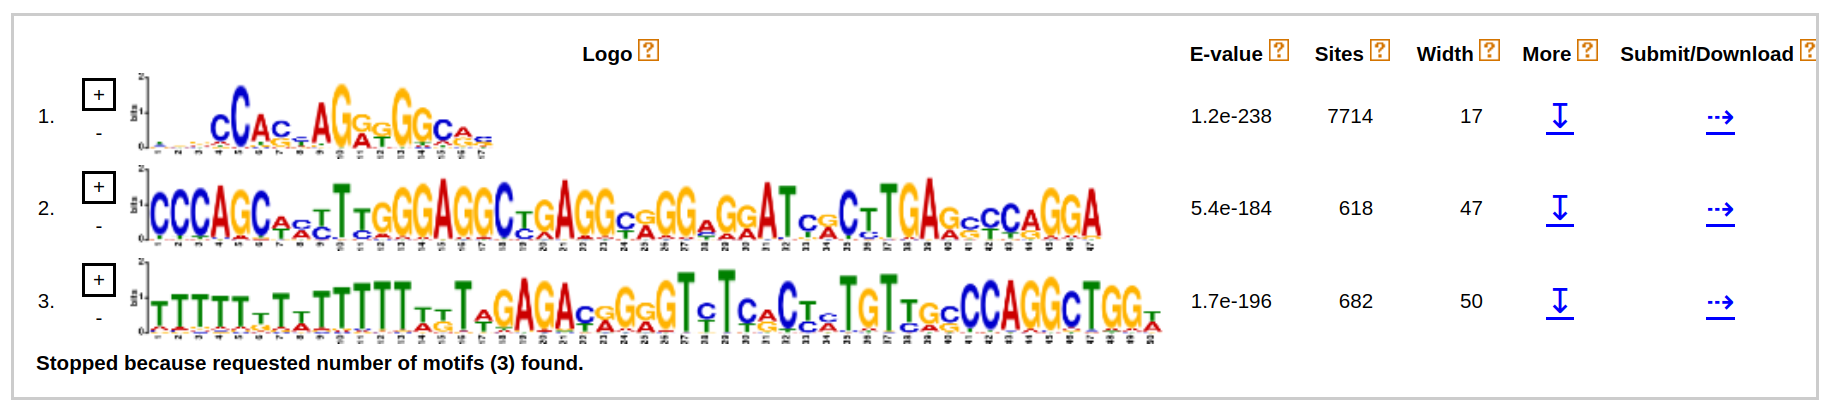

In [8]:
# Motifs reported by the search in MEME suite
input_folder = "EnrichedMotifs/MEME_CTCF1"
display.Image(f"{input_folder}/motifs.png")

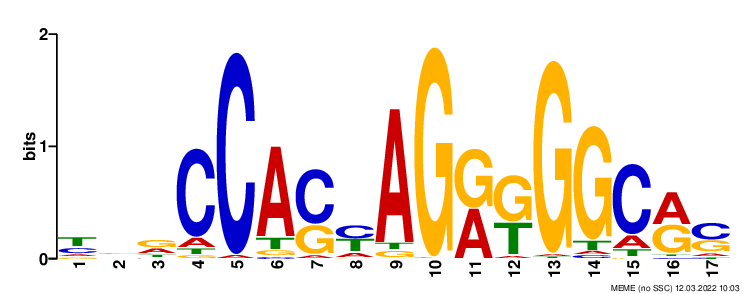

In [9]:
# Main motif
display.Image(f"{input_folder}/basicMEME.png")

**Settings**: 

* Motif Site Distribution 	ZOOPS: Zero or one site per sequence. *This implies that 7714 sites = 7714 segments in 8022 total segments* 

* Objective Function 	E-value of product of p-values

* Starting Point Function 	E-value of product of p-values

* Site Strand Handling 	Sites may be on either strand

* Maximum Number of Motifs 	3

* Motif E-value Threshold 	no limit

* Minimum Motif Width 	6

* Maximum Motif Width 	50

* Minimum Sites per Motif 	2

* Maximum Sites per Motif 	8022

Related results on MAST (Motif Alignment & Search Tool) were not considered interesting and they were thus not analyzed.

#### **Further analysis**

In [10]:
print(f"The given CTCF motif appeared in {round((7714/8022)*100, 2)}% of the working segments.")

The given CTCF motif appeared in 96.16% of the working segments.


Thus more than 90% of the segments contained the DNA binding motif, as was reported also in [3] for all of the three cell types studied (CD4+T cells, HeLa cells, and Jurkat cells). Moreover, the detected binding site matches the one presented in both [3] and [4] references.

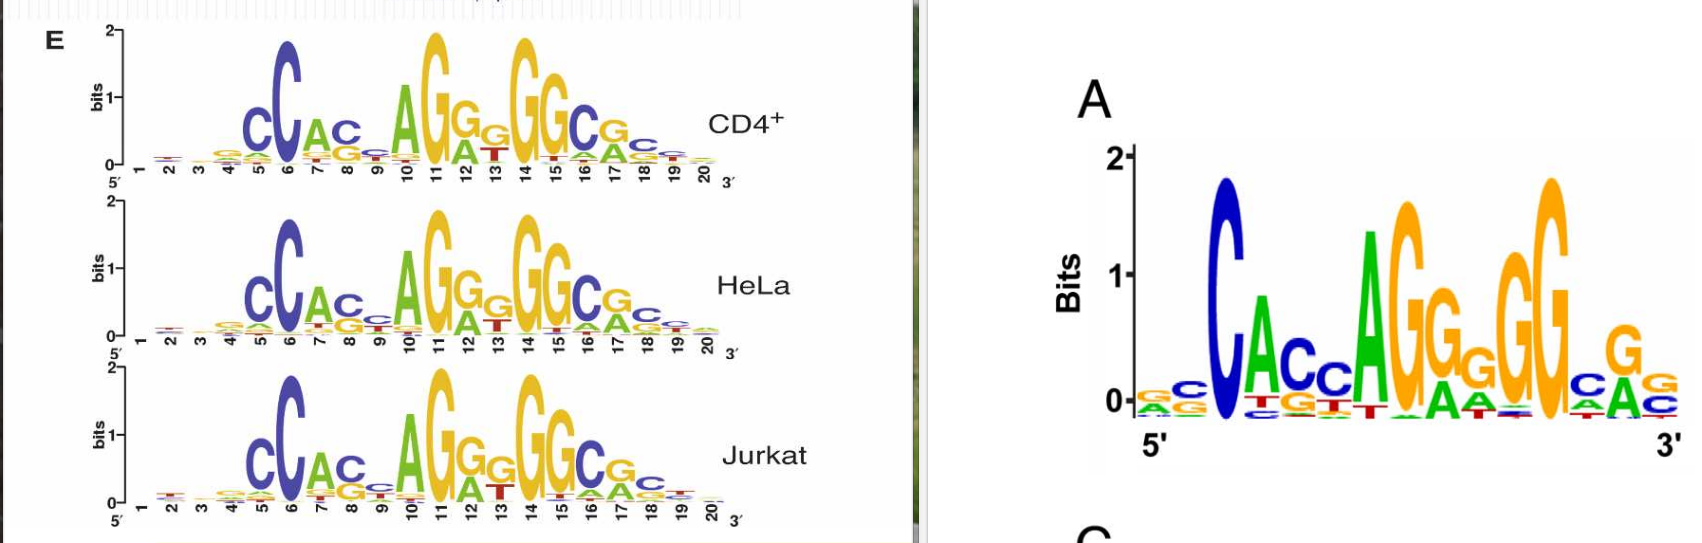

In [11]:
# Motif from papers: ref. 3 on the left, ref. 4 on the right
display.Image(f"{input_folder}/motifs_refs34.png")

##### **Protein-protein interactions and regulation of CTCF**

As reported in [3], the function of CTCF would not be regulated just at the DNA-sequence level (binding motifs), but it also involves the **binding of interacting proteins**, such as cohesin. **Cohesin** has been shown to be required to stabilize most CTCF-mediated chromosomal contacts and to be essential for CTCF function at most sites in the genome.

Depending on the cell line, 50–80% of CTCF-binding sites in the genome are also occupied by cohesin. In particular, this protein partially shares the consensus DNA binding motif of CTCF (see following image), and it has been suggested to be part of the transcriptional insulator function of CTCF complexes.

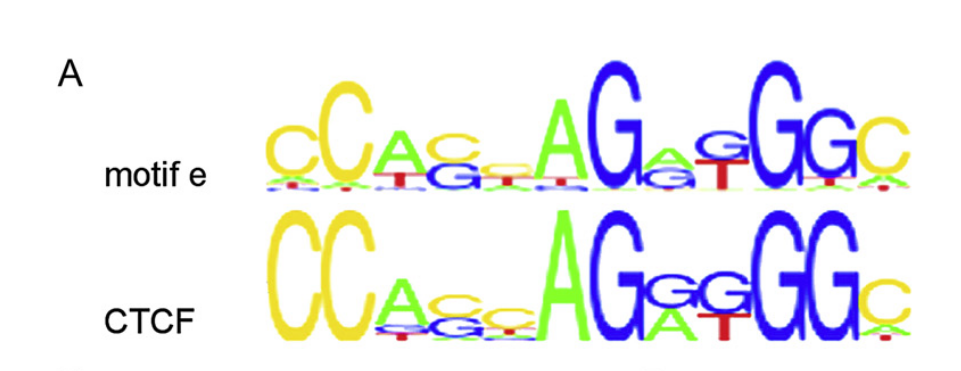

In [12]:
# Motifs reported by the search in MEME suite
input_folder = "EnrichedMotifs/MEME_CTCF1"
display.Image(f"{input_folder}/CTCF_cohesin_consSeq.png")

**Figure 6A from reference**:

Parelho V, Hadjur S, Spivakov M, Leleu M, Sauer S, Gregson HC, Jarmuz A, Canzonetta C, Webster Z, Nesterova T, Cobb BS, Yokomori K, Dillon N, Aragon L, Fisher AG, Merkenschlager M. *Cohesins functionally associate with CTCF on mammalian chromosome arms*. Cell. 2008 Feb 8;132(3):422-33. doi: 10.1016/j.cell.2008.01.011. Epub 2008 Jan 31. PMID: 18237772.

#### (2.2) **Genome Ontology analysis for CTCF binding motif**

Using the obtained CTCF binding motif, a **GoMO** (Gene Ontology for Motifs) search was further performed in the MEME suite, in order to scan all promoters to determine if the given motif was significantly associated with genes linked to one or more Genome Ontology (GO) terms. Among the results retrieved, the given CTCF binding motif was found to be related to (top 5 hits):

* **Cellular locations** such as: leading edge membrane, endoplasmic reticulum and extracellular region.
* **Molecular functions** such as: potasium ion binding, vinculated with membrane regulation.
* **Biological processes** such as chemical homeostasis.

Other interesting but slightly less significant hits were related to:

* **Cellular locations** such as: similar.
* **Molecular functions** such as: trasmembrane transporter activity, cation and metal ion binding.
* **Biological processes** such as: positive regulation of blood pressure, response to oxygen levels, mating and reproductive behaviour.

A total of 14929 were reported in the GO enrichment analysis.

On the other hand, annotation was also performed with GO (Gene Ontology) in **step 2**. Among the results, there were some coincidence with the last matches. *Visually reviewed*.

* **Cellular locations**: cytoplasm, cell membrane or cytoskeleton, neuron-related locations. <p>

* **Molecular functions**: transmembrane transport, anion/ cation regulation and bindng, ligand binding, etc. <p>

* **Biological processes**: regulation of neurogenesis, neuron differentiation and synapsis-related processes, regulation of developmental process, cell organization and membrane structure or cell-cell interactions, cytoskeletal organization.

There was **some coincidence between both searches**, even though the first one was related to a specific CTCF binding motif and the second one was part of the annotation of the working segments from the monocyte replicates. 

In fact, in ref. [4] it is recognized that ~15% of CTCF biding sites are located near promoters (...). Moreover, some enhancer elements might be enriched for CTCF, indicating that a subset of CTCF-binding sites may be important in regulating transcription to establish cell-lineage specific programmes. In this regard, some of the **biological processes** previously reported for the **GoMO** and the annotation searches are connected to specific cell development, organization and regulation (...).

#### (2.3) **Simple Enrichment Analysis for the CTCF binding motif within the DNaseI HS peaks**

Simple Enrichment analysis (SEA) was performed for the CTCF binding motif with respect to the DNaseI HS sequences provided. As input, the CTCF binding motif previously obtained through MEME was used.

**Settings**:

* Strand Handling 	Both the given and reverse complement strands are processed.

* Objective Function	Differential Enrichment

* Statistical Test	Binomial Test

* Sequence Shuffling	Control sequences are primary sequences shuffled preserving 3-mer frequencies.

* Hold-out Set	10% of the input sequences were randomly assigned to the hold-out set to improve p-value accuracy.

* Pseudocount	0.1 times the background frequencies

* Significance threshold	Motifs must have an enrichment E-value of 10 or smaller.

* Random Number Seed	0

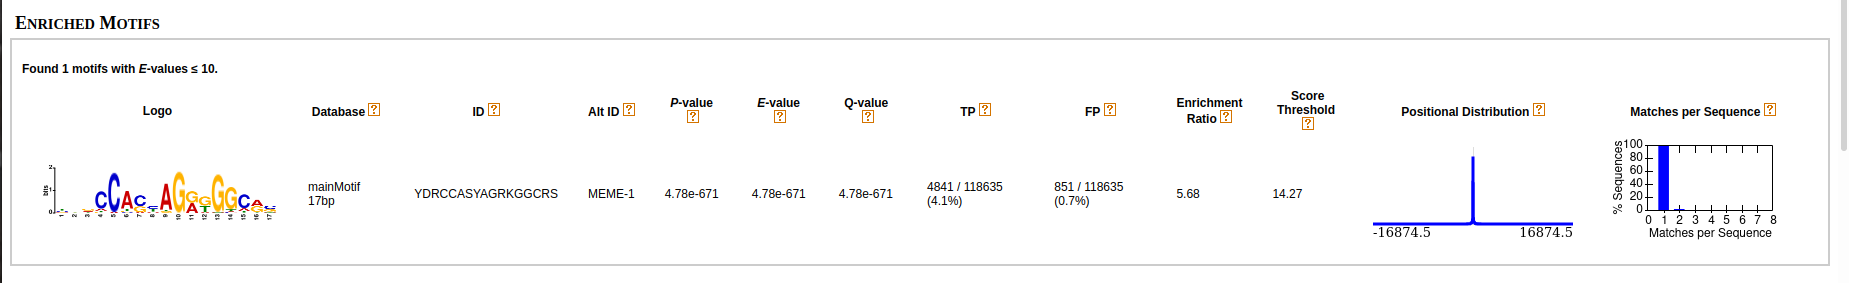

In [13]:
# Motif enrichment
display.Image(f"{input_folder}/DNaseI_peaks_analysis/SEA_DNaseI_peaks.png")

The CTCF binding motif happened to have a **5.68 enrichment ratio with respect to the control sequences** (the same DNaseI, shuffled sequences) with a p-value of 4.78e-671. The number of primary sequences matching the motif was 4841 in 118635 (~4.1% with respect to the 0.7% for the control sequences). 

The last number happens to be proximal to the **number of segments** within the common segments (4427 in 8022) which were **reported to overlap with the DNaseI HS peaks**. This eventuality might indicate that the overlapping between those E9-chromatine segments and DNaseI HS peaks usually contains (at least) one of the CTCF biding site consensus sequences.

### (3) **Step 6**
#### **Simple Enrichment Analysis for the CTCF binding motif within the hyper/hypomethylated regions**

Simple Enrichment analysis (SEA) was performed for the CTCF binding motif with respect to the hypermethylated / hypomethylated sequences provided. As input, the CTCF binding motif previously obtained through MEME was used. The parameters used were in both cases:

* Strand Handling 	Both the given and reverse complement strands are processed.

* Objective Function	Differential Enrichment

* Statistical Test	Binomial Test

* Sequence Shuffling	Control sequences are primary sequences shuffled preserving 3-mer frequencies.

* Hold-out Set	10% of the input sequences were randomly assigned to the hold-out set to improve p-value accuracy.

* Pseudocount	0.1 times the background frequencies

* Significance threshold	Motifs must have an enrichment E-value of 10 or smaller.

* Random Number Seed	0

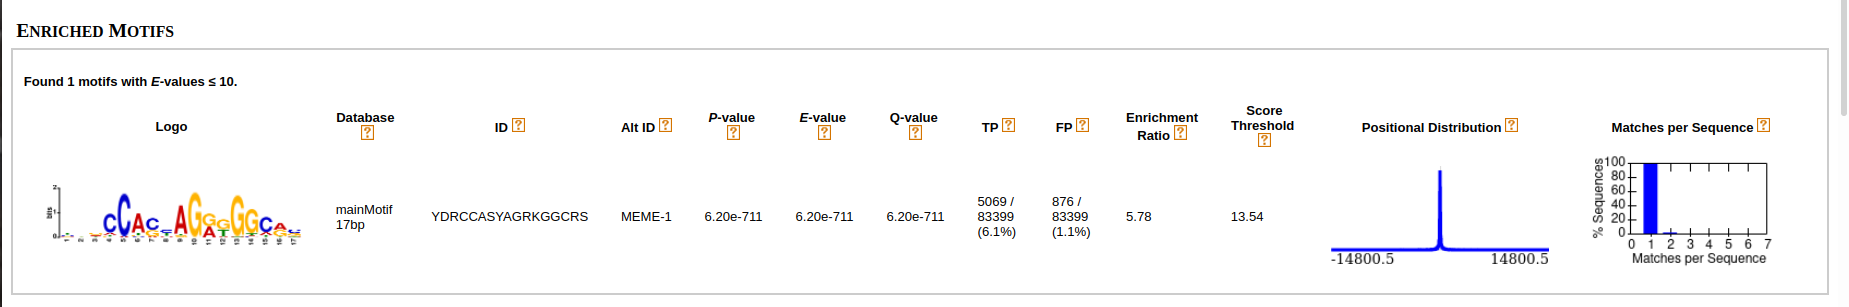

In [14]:
# Hypomethilated regions
input_folder = "Methylation"
display.Image(f"{input_folder}/hypomethylated_hg19.png")

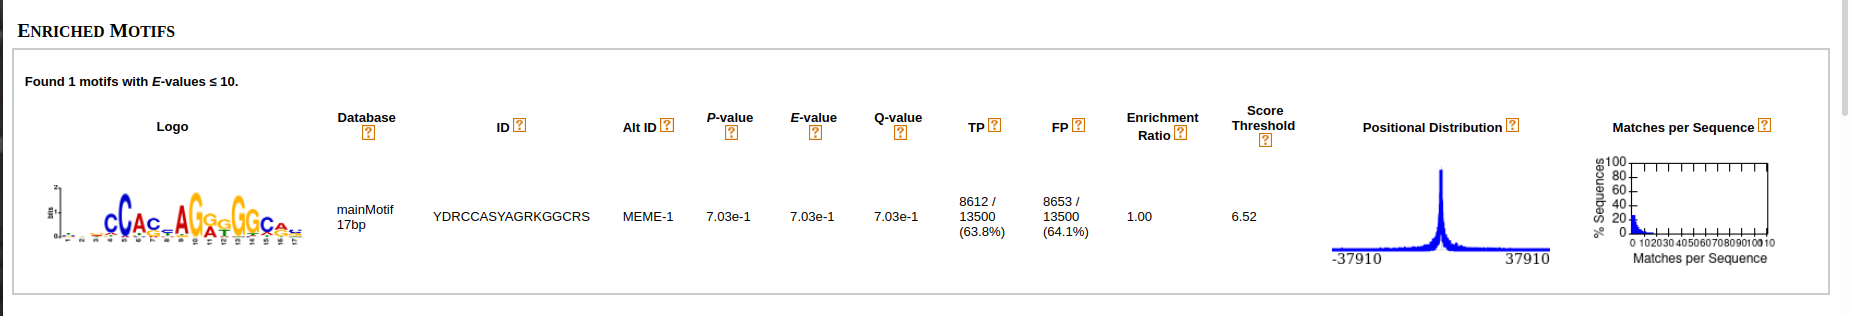

In [18]:
# Hypermethylated regions
display.Image(f"{input_folder}/hypermethylated_hg19.png")

As displayed in the last images, there was a **notable enrichment** of the CTCF DNA-binding motif in the **hypomethylated regions**, with an enrichment ratio of 5.78 and an associated Q-value of 6.20e-711 (highly significant). On the other hand, this would not be the case for the **hypermethylated regions** since there was no enrichment (enrichment ratio of 1.00), with an associated Q-value of 7.03e-1 (unsignificant).

The last facts would make sense since constitutive binding sites of CTCF are bound by this protein in non-methylated and nucleosome-free DNA regions, considering cells from different tissues [4].

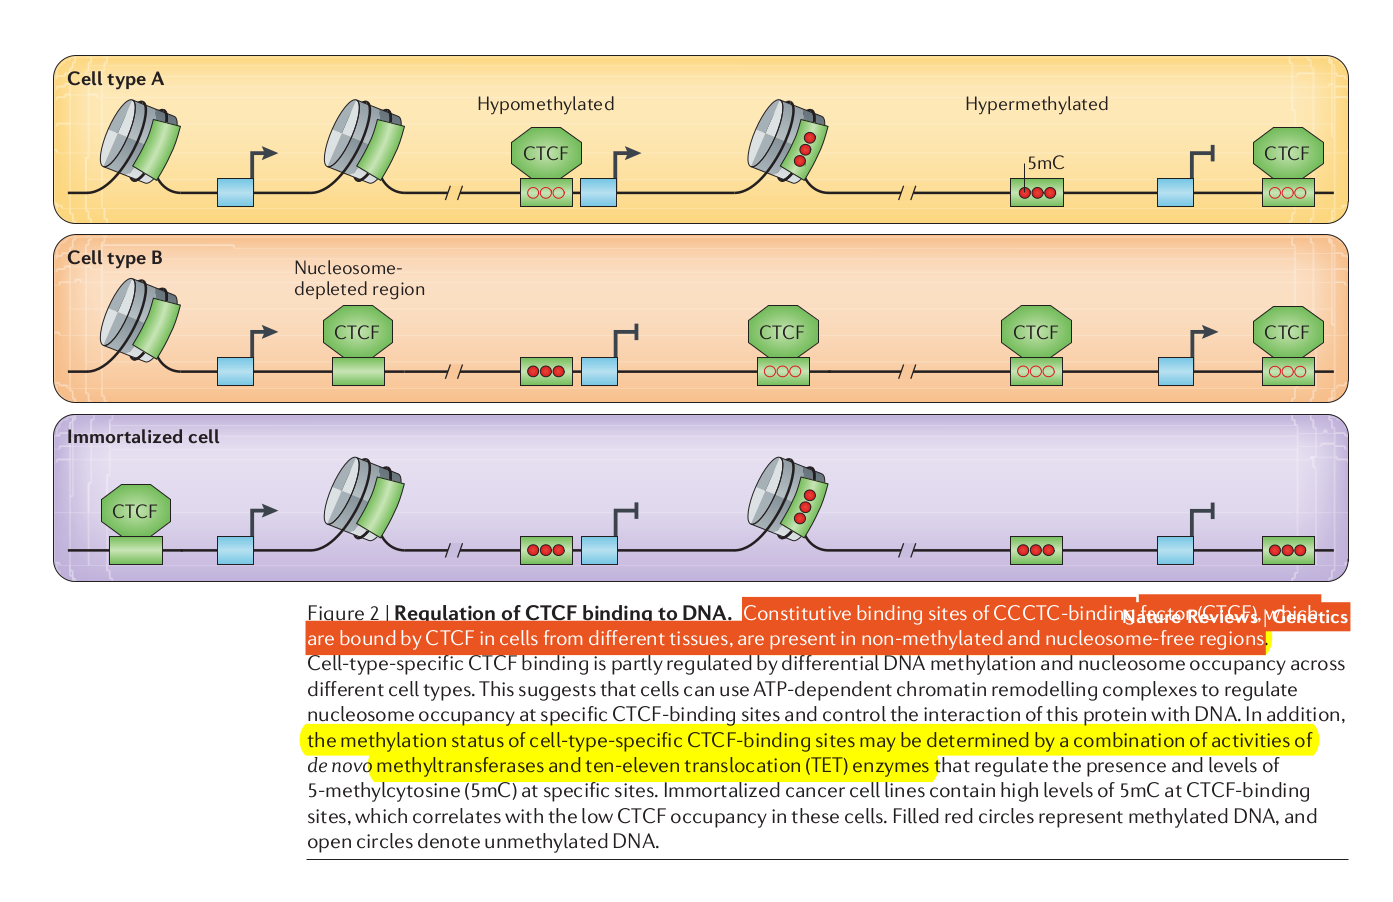

In [ ]:
# Hypermethylated regions
display.Image(f"{input_folder}/hypohyper_nature.png")

## **References**

(0) CTCF summary

(1) Lu Y, Shan G, Xue J, Chen C, Zhang C. *Defining the multivalent functions of CTCF from chromatin state and three-dimensional chromatin interactions*. Nucleic Acids Res. 2016 Jul 27;44(13):6200-12. doi: 10.1093/nar/gkw249. Epub 2016 Apr 11. PMID: 27067545; PMCID: PMC5291250. \label{1}

(2) Xi H, Shulha HP, Lin JM, Vales TR, Fu Y, Bodine DM, et al. (2007) *Identification and Characterization of Cell Type–Specific and Ubiquitous Chromatin Regulatory Structures in the Human Genome*. PLoS Genet 3(8): e136. https://doi.org/10.1371/journal.pgen.0030136. \label{2}

(3) Cuddapah S, Jothi R, Schones DE, Roh TY, Cui K, Zhao K. *Global analysis of the insulator binding protein CTCF in chromatin barrier regions reveals demarcation of active and repressive domains*. Genome Res. 2009 Jan;19(1):24-32. doi: 10.1101/gr.082800.108. Epub 2008 Dec 3. PMID: 19056695; PMCID: PMC2612964. \label{3}

(4) Ong, CT., Corces, V. *CTCF: an architectural protein bridging genome topology and function*. Nat Rev Genet 15, 234–246 (2014). https://doi.org/10.1038/nrg3663. \label{4}

(5) Ghirlando R, Felsenfeld G. CTCF: making the right connections. Genes Dev. 2016 Apr 15;30(8):881-91. doi: 10.1101/gad.277863.116. PMID: 27083996; PMCID: PMC4840295. \label{5}